In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import squarify
import matplotlib.ticker as ticker

In [10]:
""" Point of this note is to filter out the full load of
    UNPD data and make a smaller dataset that we can
    handle for plotting/analysis
"""

datapath = "../../data/unpd_data/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_REV1.xlsx"
df = pd.read_excel(datapath, ["Estimates","Low variant","Medium variant","High variant"], header=16)

In [75]:
# sensible-sized data imports (to avoid re-running cell above)!
n8b = pd.read_csv("../../data/p​repared_data/date_for_8bn.csv").loc[0:2,["scenario_name","year_id"]]
n8b

,scenario_name,year_id
0,High,2068
1,Low,2131
2,Medium,2083


In [14]:
df["Estimates"].Type.unique()

array(['World', 'Label/Separator', 'SDG region', 'Development Group',
       'Special other', 'Income Group', 'Region', 'Subregion',
       'Country/Area'], dtype=object)

In [16]:
[d.shape for d in df.values()]

[(20596, 65), (22598, 65), (22598, 65), (22598, 65)]

In [17]:
df["Estimates"].columns

Index(['Index', 'Variant', 'Region, subregion, country or area *', 'Notes',
       'Location code', 'ISO3 Alpha-code', 'ISO2 Alpha-code', 'SDMX code**',
       'Type', 'Parent code', 'Year',
       'Total Population, as of 1 January (thousands)',
       'Total Population, as of 1 July (thousands)',
       'Male Population, as of 1 July (thousands)',
       'Female Population, as of 1 July (thousands)',
       'Population Density, as of 1 July (persons per square km)',
       'Population Sex Ratio, as of 1 July (males per 100 females)',
       'Median Age, as of 1 July (years)',
       'Natural Change, Births minus Deaths (thousands)',
       'Rate of Natural Change (per 1,000 population)',
       'Population Change (thousands)', 'Population Growth Rate (percentage)',
       'Population Annual Doubling Time (years)', 'Births (thousands)',
       'Births by women aged 15 to 19 (thousands)',
       'Crude Birth Rate (births per 1,000 population)',
       'Total Fertility Rate (live births

In [22]:
df_tot = pd.concat(df.values())

In [27]:
cols_keep = [
    "Variant",
    "Region, subregion, country or area *", "Type",
    'Year',
    'Total Population, as of 1 July (thousands)',
    'Male Population, as of 1 July (thousands)',
    'Female Population, as of 1 July (thousands)',
    'Population Density, as of 1 July (persons per square km)',
    'Population Sex Ratio, as of 1 July (males per 100 females)',
    'Median Age, as of 1 July (years)',
    'Natural Change, Births minus Deaths (thousands)',
    'Population Change (thousands)', 'Population Growth Rate (percentage)',
    'Births (thousands)',
    'Births by women aged 15 to 19 (thousands)',
    'Total Fertility Rate (live births per woman)',
    'Mean Age Childbearing (years)',
    'Total Deaths (thousands)', 'Male Deaths (thousands)',
    'Female Deaths (thousands)',
    'Life Expectancy at Birth, both sexes (years)',
    'Male Life Expectancy at Birth (years)',
    'Female Life Expectancy at Birth (years)',
    'Net Number of Migrants (thousands)',
    'Net Migration Rate (per 1,000 population)'
]
df_flt = df_tot.loc[:,cols_keep]

In [28]:
df_flt

,Variant,"Region, subregion, country or area *",Type,Year,"Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)",...,Total Fertility Rate (live births per woman),Mean Age Childbearing (years),Total Deaths (thousands),Male Deaths (thousands),Female Deaths (thousands),"Life Expectancy at Birth, both sexes (years)",Male Life Expectancy at Birth (years),Female Life Expectancy at Birth (years),Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,Estimates,WORLD,World,1950.0,2499322.157,1245362.965,1253959.192,19.166,99.314,22.224,...,4.86,28.945,48788.536,25784.509,23004.027,46.464,44.595,48.441,0,0
1,Estimates,WORLD,World,1951.0,2543130.38,1267473.182,1275657.198,19.502,99.358,22.172,...,4.827,28.91,48514.552,25505.184,23009.368,47.144,45.403,48.965,0,0
2,Estimates,WORLD,World,1952.0,2590270.899,1291399.982,1298870.917,19.864,99.425,22.108,...,5.014,28.98,47646.612,24935.224,22711.388,48.231,46.624,49.891,0,0
3,Estimates,WORLD,World,1953.0,2640278.797,1316659.222,1323619.574,20.247,99.474,22.036,...,4.937,28.928,47499.083,24806.138,22692.945,48.802,47.24,50.407,0,0
4,Estimates,WORLD,World,1954.0,2691979.339,1342923.171,1349056.168,20.643,99.545,21.952,...,5.01,28.943,47002.805,24539.831,22462.974,49.592,48.029,51.189,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22593,High,Wallis and Futuna Islands,Country/Area,2096.0,14.376,7.218,7.158,102.686,100.838,40.773,...,2.193,30.114,0.124,0.059,0.065,89.179,88.601,89.692,-0.01,-0.695
22594,High,Wallis and Futuna Islands,Country/Area,2097.0,14.423,7.245,7.178,103.021,100.919,40.774,...,2.197,30.121,0.126,0.061,0.066,89.28,88.701,89.799,-0.01,-0.693
22595,High,Wallis and Futuna Islands,Country/Area,2098.0,14.47,7.271,7.199,103.354,100.993,40.791,...,2.191,30.128,0.128,0.062,0.066,89.408,88.801,89.963,-0.01,-0.691
22596,High,Wallis and Futuna Islands,Country/Area,2099.0,14.518,7.297,7.221,103.7,101.052,40.808,...,2.192,30.135,0.13,0.063,0.067,89.51,88.903,90.072,-0.01,-0.688


In [77]:
n8b_flt = df_flt.merge(n8b, left_on=["Year","Variant"], right_on=["year_id","scenario_name"])
n8b_flt

,Variant,"Region, subregion, country or area *",Type,Year,"Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)",...,"Life Expectancy at Birth, both sexes (years)",Male Life Expectancy at Birth (years),Female Life Expectancy at Birth (years),Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)","Total Population, as of 1 July",Total Population (Billions),Births (Millions),scenario_name,year_id
0,Medium,WORLD,World,2083,10427226.4,5192372.853,5234853.548,79.961,99.189,40.299,...,80.525,78.252,82.908,0,0,10427226400.0,10.427226,120968.156,Medium,2083
1,Medium,Sub-Saharan Africa,SDG region,2083,3122089.119,1541798.579,1580290.54,142.79,97.564,30.849,...,71.525,68.776,74.36,-301.758,-0.097,3122089119.0,3.122089,50897.449,Medium,2083
2,Medium,Northern Africa and Western Asia,SDG region,2083,918345.161,461506.232,456838.929,73.594,101.022,38.549,...,82.209,80.155,84.348,-148.378,-0.162,918345161.0,0.918345,11111.757,Medium,2083
3,Medium,Central and Southern Asia,SDG region,2083,2674480.507,1338005.937,1336474.57,258.884,100.115,42.739,...,82.088,80.368,83.879,-1266.755,-0.474,2674480507.0,2.674481,27660.244,Medium,2083
4,Medium,Eastern and South-Eastern Asia,SDG region,2083,1879084.219,943822.985,935261.234,115.704,100.915,50.219,...,85.464,83.473,87.603,-321.518,-0.171,1879084219.0,1.879084,14961.428,Medium,2083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,High,Samoa,Country/Area,2068,448.882,229.511,219.372,158.616,104.622,25.1,...,79.635,77.263,82.016,-1.5,-3.336,448882.0,0.000449,9.736,High,2068
568,High,Tokelau,Country/Area,2068,3.135,1.577,1.558,261.292,101.252,32.361,...,80.993,79.666,82.295,0,0,3135.0,0.000003,0.052,High,2068
569,High,Tonga,Country/Area,2068,166.024,84.087,81.936,255.421,102.625,27.62,...,77.458,74.454,80.35,-0.8,-4.807,166024.0,0.000166,3.225,High,2068
570,High,Tuvalu,Country/Area,2068,17.004,8.522,8.482,566.8,100.472,26.075,...,71.874,67.895,76.166,-0.06,-3.522,17004.0,0.000017,0.344,High,2068


In [198]:
df_flt.apply(lambda val: val=="...")

df_flt.loc[:, "Total Population, as of 1 July"] = df_flt.loc[:,"Total Population, as of 1 July (thousands)"]*1_000
df_flt = df_flt[df_flt.Year.notna()]
df_flt.Year = df_flt.Year.astype(int)
df_flt.loc[:,"Total Population (Billions)"] = df_flt.loc[:, "Total Population, as of 1 July"]/1e9

df_flt.to_csv("../../data/prepared_data/unpd_large.csv")
# this is thrown by data formatting (e.g. holy see)
#df_flt.loc[:,"Births (Millions)"] = df_flt.loc[:,"Births (thousands)"].apply(float)/1e3

df_regional = df_flt[df_flt.Type=="Region"]
df_regional.loc[:,"Region, subregion, country or area *"] = df_regional["Region, subregion, country or area *"].apply(lambda c: c.capitalize())
df_regional

,Variant,"Region, subregion, country or area *",Type,Year,"Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)",...,Male Deaths (thousands),Female Deaths (thousands),"Life Expectancy at Birth, both sexes (years)",Male Life Expectancy at Birth (years),Female Life Expectancy at Birth (years),Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)","Total Population, as of 1 July",Total Population (Billions),Births (Millions)
1588,Estimates,Africa,Region,1950,227549.258,113474.172,114075.086,7.7,99.473,18.129,...,3152.087,2910.899,37.624,36.436,38.838,-28.286,-0.124,227549258.0,0.227549,10949.117
1589,Estimates,Africa,Region,1951,232483.995,115915.005,116568.989,7.867,99.439,18.116,...,3187.351,2945.1,37.931,36.729,39.158,-56.348,-0.242,232483995.0,0.232484,11200.481
1590,Estimates,Africa,Region,1952,237586.06,118442.586,119143.474,8.04,99.412,18.092,...,3199.46,2955.403,38.443,37.223,39.689,-100.834,-0.424,237586060.0,0.237586,11448.324
1591,Estimates,Africa,Region,1953,242837.448,121050.757,121786.691,8.218,99.396,18.052,...,3216.657,2971.406,38.915,37.687,40.169,-210.067,-0.865,242837448.0,0.242837,11708.347
1592,Estimates,Africa,Region,1954,248244.771,123736.856,124507.915,8.401,99.381,17.995,...,3252.43,2981.093,39.299,37.947,40.69,-203.348,-0.819,248244771.0,0.248245,11941.297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20460,High,Oceania,Region,2096,91775.079,46096.022,45679.057,10.811,100.913,37.337,...,387.502,355.676,86.769,84.624,88.998,145.016,1.581,91775079.0,0.091775,1297.644
20461,High,Oceania,Region,2097,92474.57,46449.255,46025.315,10.894,100.921,37.407,...,388.926,356.766,86.884,84.746,89.103,145.016,1.569,92474570.0,0.092475,1300.751
20462,High,Oceania,Region,2098,93175.917,46803.325,46372.592,10.976,100.929,37.481,...,390.441,357.925,87,84.87,89.211,145.016,1.558,93175917.0,0.093176,1306.533
20463,High,Oceania,Region,2099,93881.74,47159.572,46722.168,11.06,100.936,37.558,...,392.162,359.314,87.116,84.992,89.318,145.016,1.546,93881740.0,0.093882,1315.417


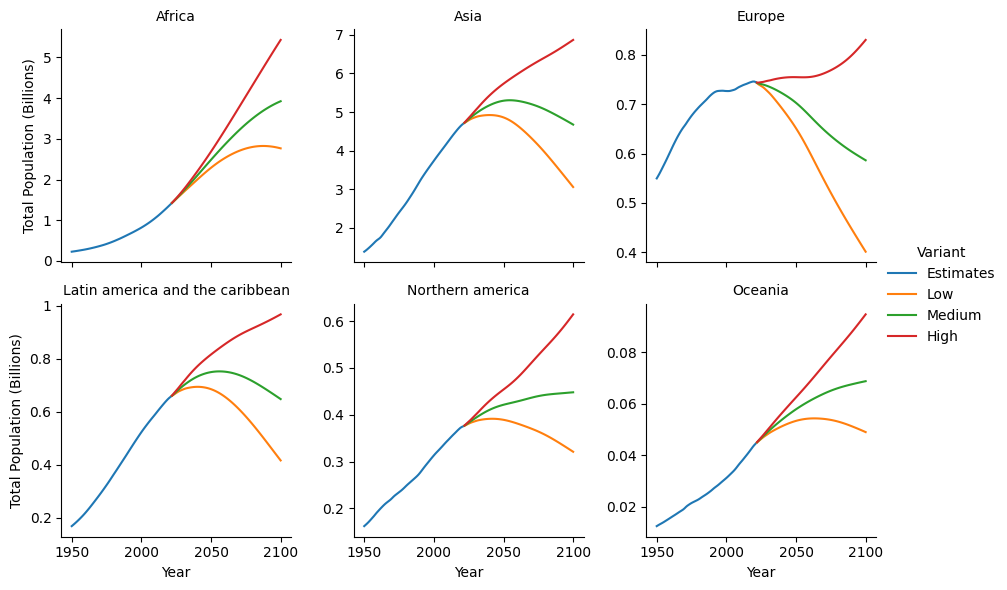

In [102]:
def line_scaled(*args, scale=1, **kwargs):
    ax = sns.lineplot(x=args[0], y=args[1], **kwargs)
    
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale))
    ax.yaxis.set_major_formatter(ticks_y)

f = sns.FacetGrid(data=df_regional,
                  col="Region, subregion, country or area *",
                  hue="Variant",
                  col_wrap=3,
                  sharex=True,
                  sharey=False)
f.map(line_scaled, "Year", "Total Population (Billions)",)
#f.map(plt.plot, "year_id", "Total Population (Billions)")
f.set_titles("{col_name}")
f.add_legend()

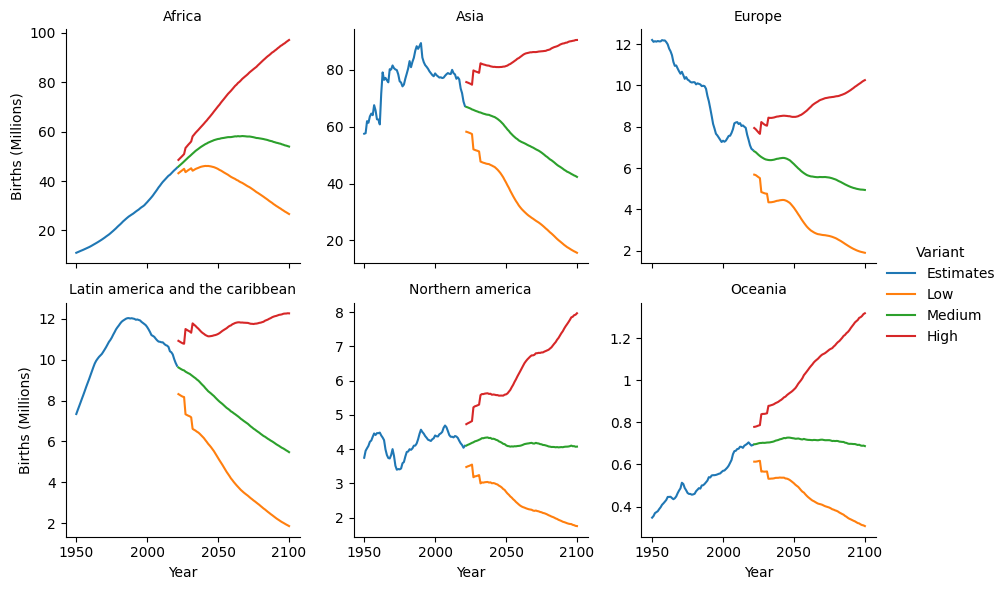

In [104]:
f = sns.FacetGrid(data=df_regional,
                  col="Region, subregion, country or area *",
                  hue="Variant",
                  col_wrap=3,
                  sharex=True,
                  sharey=False)
f.map(line_scaled, "Year", "Births (thousands)", scale=1e3)
f.set_titles("{col_name}")
f.add_legend()
f.set_ylabels("Births (Millions)")

In [199]:
df_regional

,Variant,"Region, subregion, country or area *",Type,Year,"Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)",...,Male Deaths (thousands),Female Deaths (thousands),"Life Expectancy at Birth, both sexes (years)",Male Life Expectancy at Birth (years),Female Life Expectancy at Birth (years),Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)","Total Population, as of 1 July",Total Population (Billions),Births (Millions)
1588,Estimates,Africa,Region,1950,227549.258,113474.172,114075.086,7.7,99.473,18.129,...,3152.087,2910.899,37.624,36.436,38.838,-28.286,-0.124,227549258.0,0.227549,10949.117
1589,Estimates,Africa,Region,1951,232483.995,115915.005,116568.989,7.867,99.439,18.116,...,3187.351,2945.1,37.931,36.729,39.158,-56.348,-0.242,232483995.0,0.232484,11200.481
1590,Estimates,Africa,Region,1952,237586.06,118442.586,119143.474,8.04,99.412,18.092,...,3199.46,2955.403,38.443,37.223,39.689,-100.834,-0.424,237586060.0,0.237586,11448.324
1591,Estimates,Africa,Region,1953,242837.448,121050.757,121786.691,8.218,99.396,18.052,...,3216.657,2971.406,38.915,37.687,40.169,-210.067,-0.865,242837448.0,0.242837,11708.347
1592,Estimates,Africa,Region,1954,248244.771,123736.856,124507.915,8.401,99.381,17.995,...,3252.43,2981.093,39.299,37.947,40.69,-203.348,-0.819,248244771.0,0.248245,11941.297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20460,High,Oceania,Region,2096,91775.079,46096.022,45679.057,10.811,100.913,37.337,...,387.502,355.676,86.769,84.624,88.998,145.016,1.581,91775079.0,0.091775,1297.644
20461,High,Oceania,Region,2097,92474.57,46449.255,46025.315,10.894,100.921,37.407,...,388.926,356.766,86.884,84.746,89.103,145.016,1.569,92474570.0,0.092475,1300.751
20462,High,Oceania,Region,2098,93175.917,46803.325,46372.592,10.976,100.929,37.481,...,390.441,357.925,87,84.87,89.211,145.016,1.558,93175917.0,0.093176,1306.533
20463,High,Oceania,Region,2099,93881.74,47159.572,46722.168,11.06,100.936,37.558,...,392.162,359.314,87.116,84.992,89.318,145.016,1.546,93881740.0,0.093882,1315.417


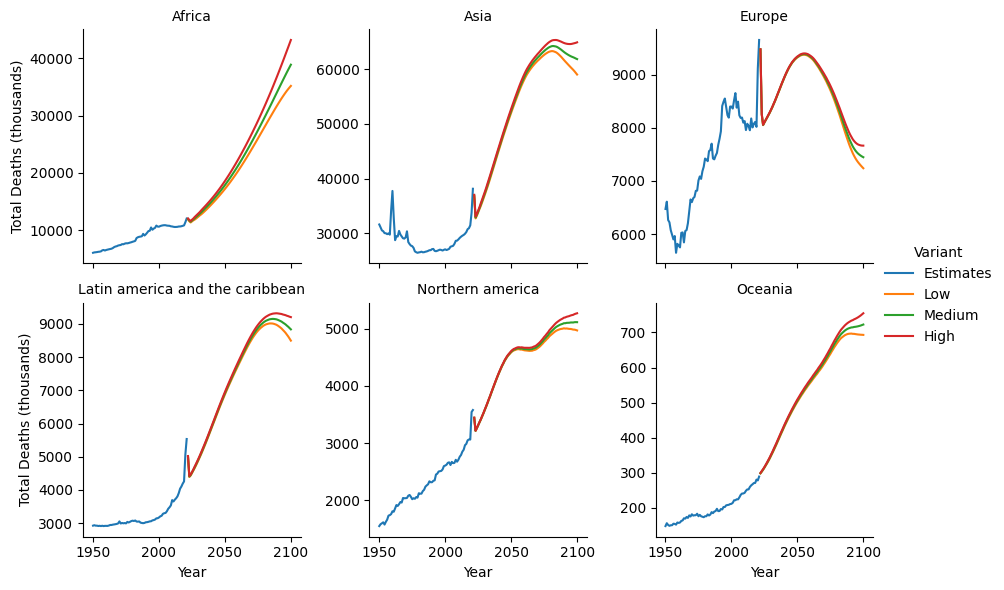

In [71]:
f = sns.FacetGrid(data=df_regional,
                  col="Region, subregion, country or area *",
                  hue="Variant",
                  col_wrap=3,f = sns.FacetGrid(data=df_regional,
                  col="Region, subregion, country or area *",
                  hue="Variant",
                  col_wrap=3,
                  sharex=True,
                  sharey=False)
f.map(sns.lineplot, "Year", "Total Deaths (thousands)",)
f.set_titles("{col_name}")
f.add_legend()
                  sharex=True,
                  sharey=False)
f.map(sns.lineplot, "Year", "Total Deaths (thousands)",)
f.set_titles("{col_name}")
f.add_legend()

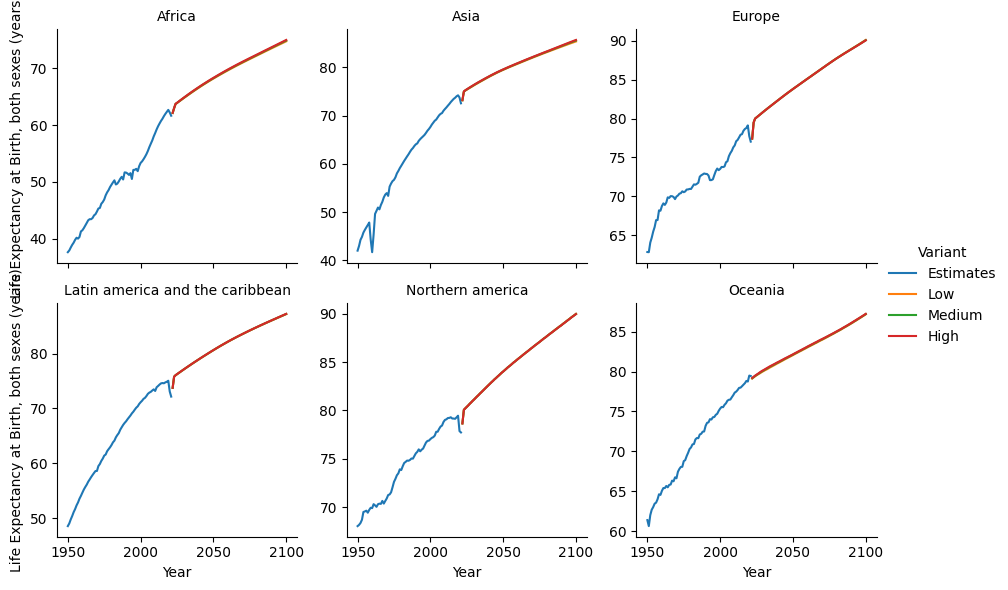

In [201]:
f = sns.FacetGrid(data=df_regional,
                  col="Region, subregion, country or area *",
                  hue="Variant",
                  col_wrap=3,
                  sharex=True,
                  sharey=False)
f.map(sns.lineplot, "Year", "Life Expectancy at Birth, both sexes (years)",)
f.set_titles("{col_name}")
f.add_legend()

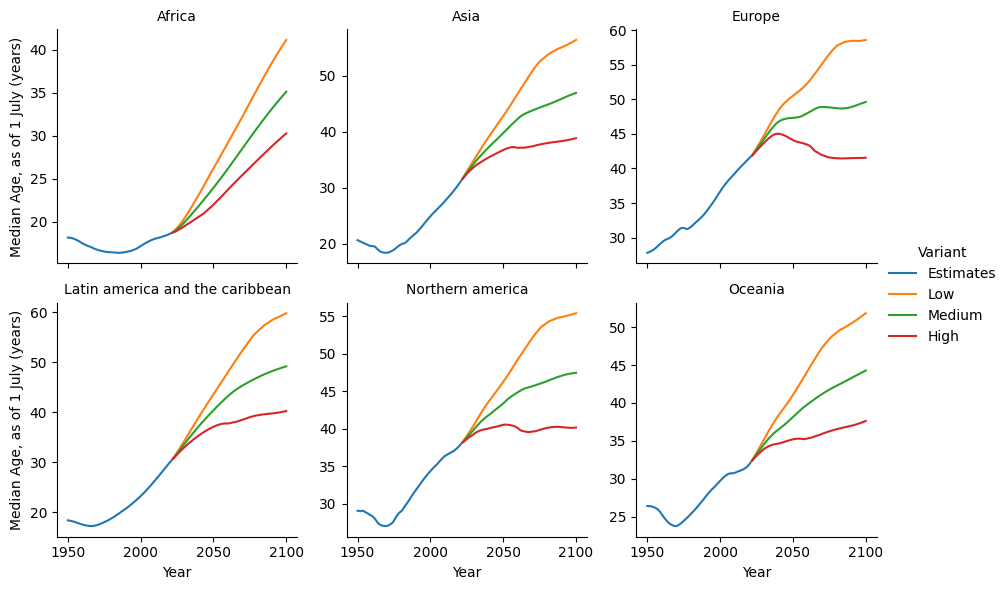

In [72]:
f = sns.FacetGrid(data=df_regional,
                  col="Region, subregion, country or area *",
                  hue="Variant",
                  col_wrap=3,
                  sharex=True,
                  sharey=False)
f.map(sns.lineplot, "Year", "Median Age, as of 1 July (years)",)
f.set_titles("{col_name}")
f.add_legend()

In [ ]:
df_regional["Median Age, as of 1 July (years)"]

In [109]:
treemap_data = df_flt.loc[(df_flt.Year==2100) & (df_flt.Type=="Country/Area"), ["Variant","Region, subregion, country or area *","Total Population (Billions)"]]

<Axes: >

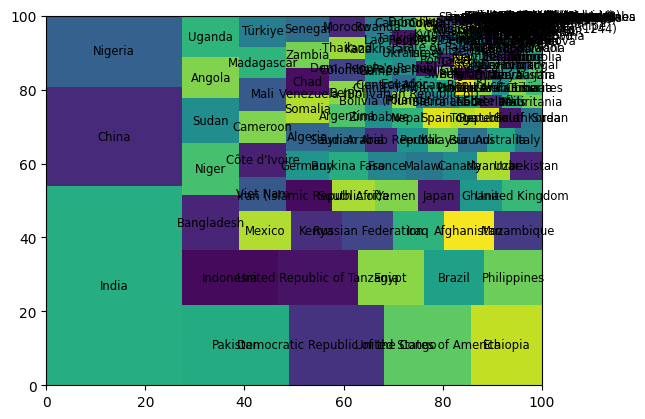

In [121]:
med_treemap = treemap_data[treemap_data.Variant=="Medium"].sort_values("Total Population (Billions)", ascending=False)

#med_treemap[med_treemap["Total Population (Billions)"] < 0.01].sum()

squarify.plot(med_treemap.loc[:,"Total Population (Billions)"].apply(lambda x: int(x*1e9)).values,
              label=med_treemap.loc[:,"Region, subregion, country or area *"].values,
             text_kwargs=dict(size="small"))

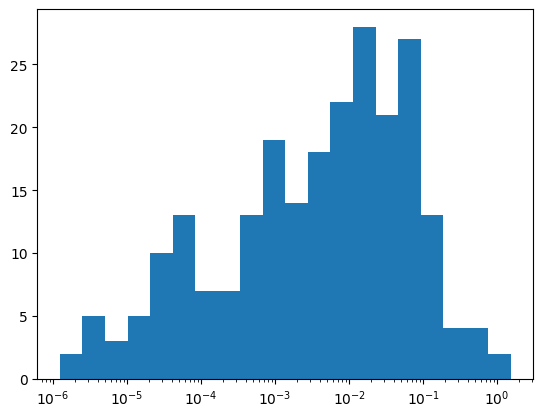

In [128]:
def plot_loghist(x, bins):
  hist, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  plt.hist(x, bins=logbins)
  plt.xscale('log')

plot_loghist(med_treemap["Total Population (Billions)"], 20)

In [180]:
thresh = 0.01
other_pop = med_treemap[med_treemap["Total Population (Billions)"] < thresh]["Total Population (Billions)"].sum()
med_tmap = med_treemap.loc[med_treemap["Total Population (Billions)"] >= thresh].copy()
med_tmap.iloc[-1] = ["Medium","Other",other_pop]
#med_tmap.loc[:,"Region, subregion, country or area *"] = med_tmap["Region, subregion, country or area *"].map({"United Kindom": "UK", "United Republic of Tanzania": "Tanzania"})
med_tmap.loc[med_treemap["Total Population (Billions)"] < 0.1,"Region, subregion, country or area *"] = med_tmap\
    .loc[med_treemap["Total Population (Billions)"] < 0.1,"Region, subregion, country or area *"]\
    .apply(lambda t: t[:4] if t != "Other" else t) # just first four chars if under threshold

med_tmap = med_tmap.sort_values("Total Population (Billions)", ascending=False)

(0.0, 100.0, 0.0, 100.0)

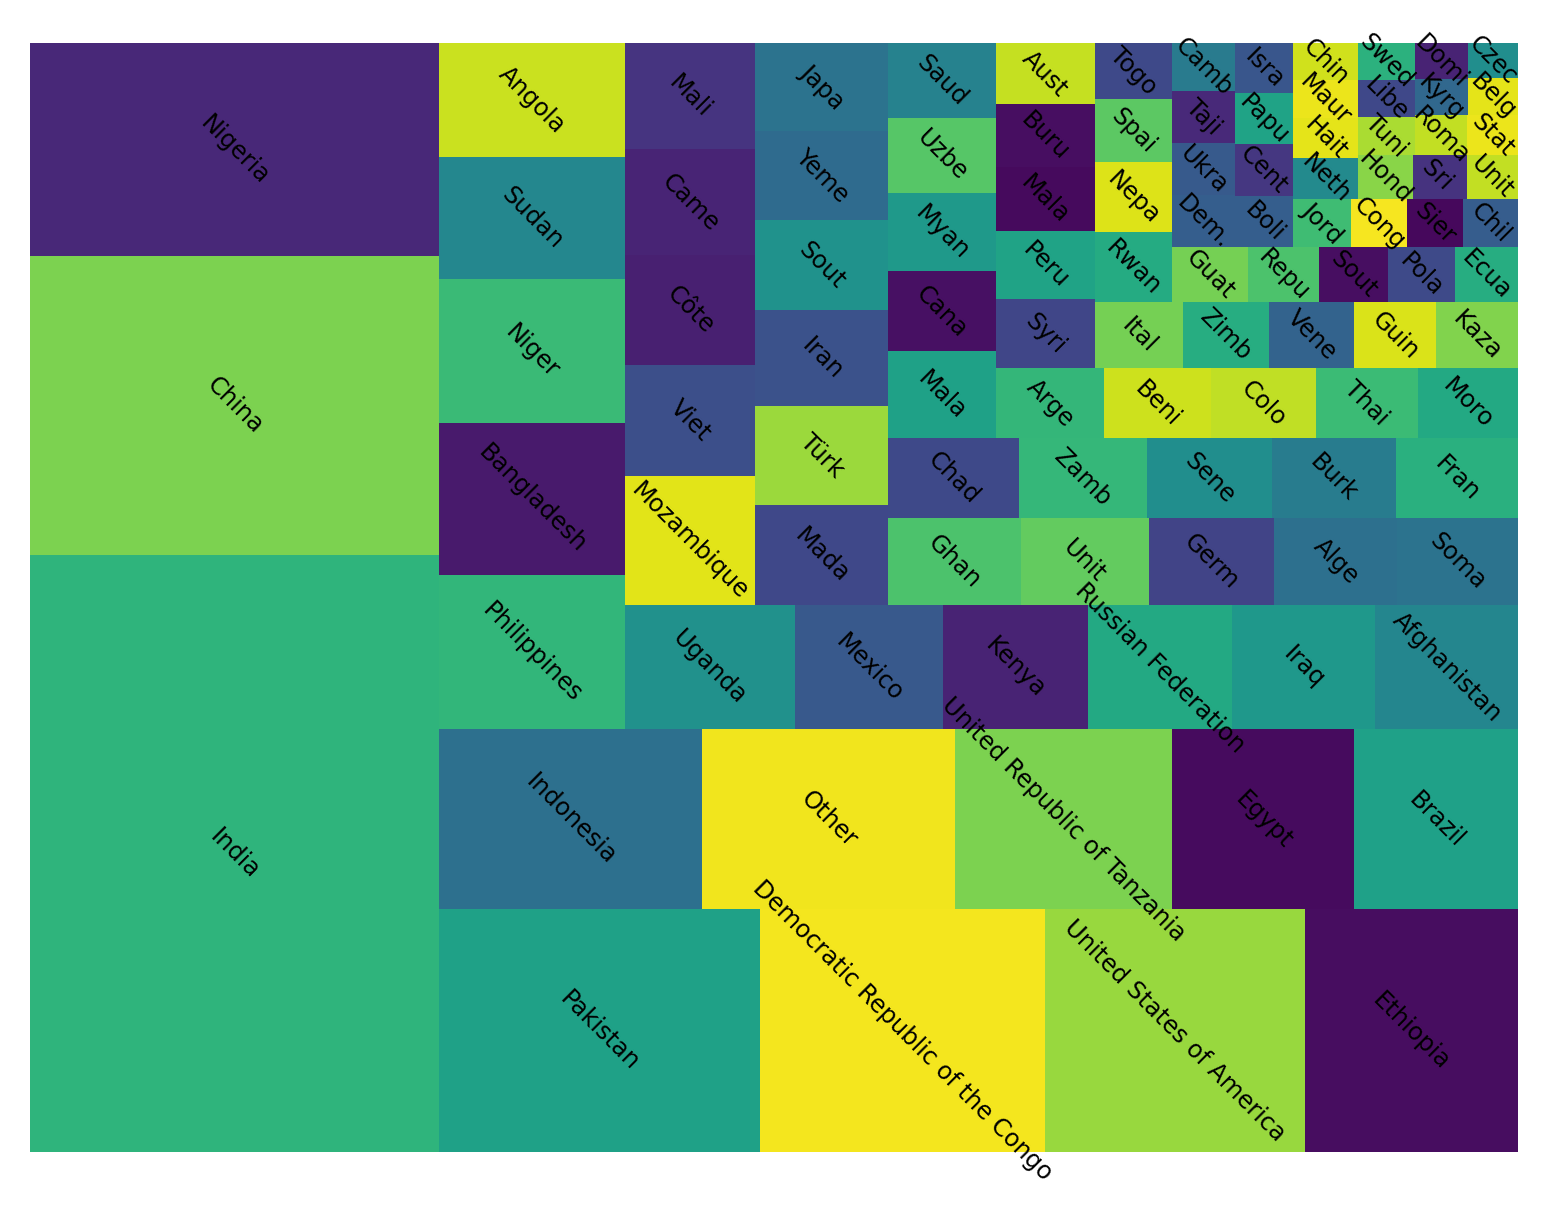

In [181]:
fig, ax = plt.subplots(dpi=300)

ax = squarify.plot(med_tmap.loc[:,"Total Population (Billions)"].apply(lambda x: int(x*1e9)).values,
              label=med_tmap.loc[:,"Region, subregion, country or area *"].values,
              ax=ax,
              text_kwargs=dict(size="xx-small", rotation=-45))​
ax.axis("off")

In [196]:
treemap_data_now = df_flt\
    .loc[(df_flt.Year==2023) & (df_flt.Type=="Country/Area") & (df_flt.Variant=="Medium"),
         ["Region, subregion, country or area *","Total Population (Billions)"]
        ]
thresh_now = 0.01
other_pop_now = treemap_data_now[treemap_data_now["Total Population (Billions)"] < thresh_now]["Total Population (Billions)"].sum()
med_tmap_now = treemap_data_now.loc[treemap_data_now["Total Population (Billions)"] >= thresh_now].copy()
med_tmap_now.iloc[-1] = ["Other",other_pop_now]

med_tmap_now.loc[treemap_data_now["Total Population (Billions)"] < 0.1,"Region, subregion, country or area *"] = treemap_data_now\
    .loc[treemap_data_now["Total Population (Billions)"] < 0.1,"Region, subregion, country or area *"]\
    .apply(lambda t: t[:4] if t != "Other" else t) # just first four chars if under threshold

med_tmap_now = med_tmap_now.sort_values("Total Population (Billions)", ascending=False)

(0.0, 100.0, 0.0, 100.0)

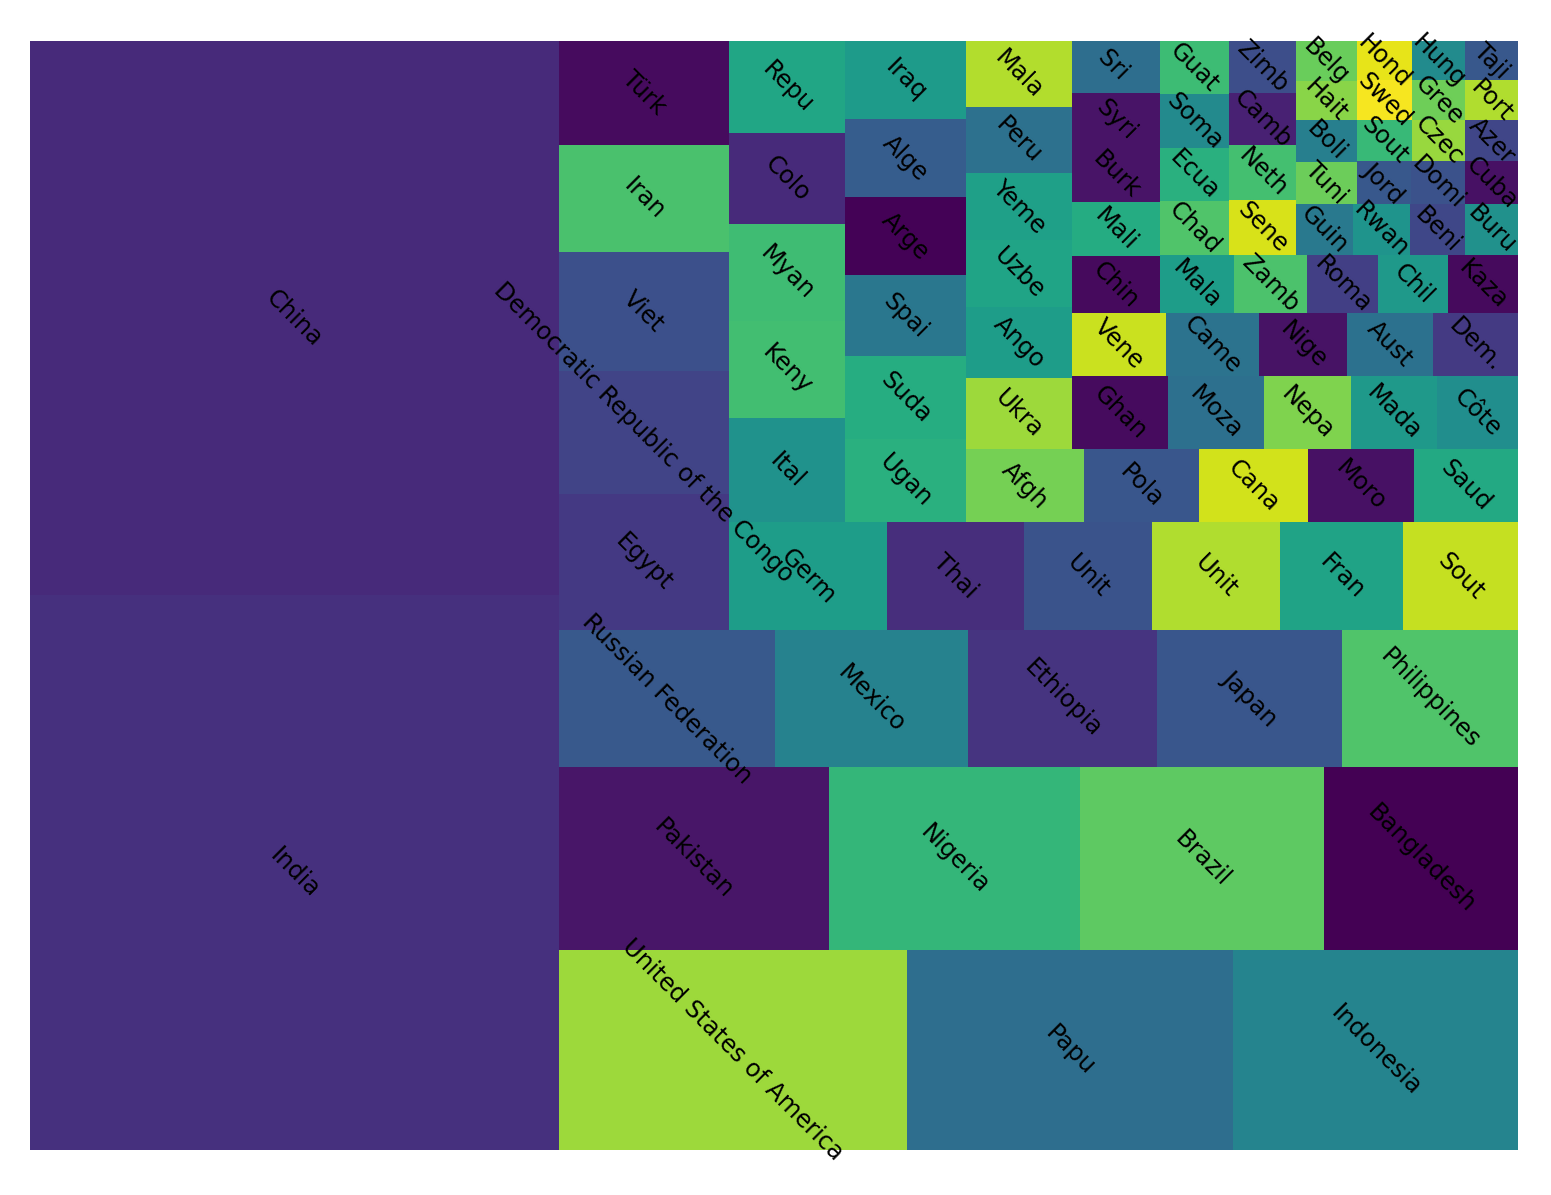

In [197]:
fig, ax = plt.subplots(dpi=300)

ax = squarify.plot(med_tmap_now.loc[:,"Total Population (Billions)"].apply(lambda x: int(x*1e9)).values,
              label=med_tmap_now.loc[:,"Region, subregion, country or area *"].values,
              ax=ax,
              text_kwargs=dict(size="xx-small", rotation=-45))
ax.axis("off")

In [205]:
datapath_dep = "../../data/unpd_data/WPP2022_POP_F07_1_DEPENDENCY_RATIOS_BOTH_SEXES.xlsx"
df_dep = pd.read_excel(datapath_dep, ["Estimates","Low variant","Medium variant","High variant"], header=16)

In [207]:
df_d = pd.concat(df_dep.values())

In [209]:
df_d.columns

Index(['Index', 'Variant', 'Region, subregion, country or area *', 'Notes',
       'Location code', 'ISO3 Alpha-code', 'ISO2 Alpha-code', 'SDMX code**',
       'Type', 'Parent code', 'Year',
       'Annual total dep. ratio [(0-14 & 65+) / 15-64] (%)',
       'Annual total dep. ratio [(0-19 & 65+) / 20-64] (%)',
       'Annual total dep. ratio [(0-19 & 70+) / 20-69] (%)',
       'Annual total dep. ratio [(0-24 & 70+) / 25-69] (%)',
       'Annual total dep. ratio [(0-24 & 65+) / 25-64] (%)',
       'Annual child dep. ratio [0-14 / 15-64] (%)',
       'Annual child dep. ratio [0-19 / 20-64] (%)',
       'Annual child dep. ratio [0-19 / 20-69] (%)',
       'Annual child dep. ratio [0-24 / 25-69] (%)',
       'Annual child dep. ratio [0-24 / 25-64] (%)',
       'Annual old-age dep. ratio [65+ / 15-64] (%)',
       'Annual old-age dep. ratio [65+ / 20-64] (%)',
       'Annual old-age dep. ratio [70+ / 20-69] (%)',
       'Annual old-age dep. ratio [70+ / 25-69] (%)',
       'Annual old-age 

In [211]:
dep_cols = ['Variant', 'Region, subregion, country or area *', 'Type', 'Year', 'Annual total dep. ratio [(0-14 & 65+) / 15-64] (%)']
df_d[dep_cols].to_csv("../../data/prepared_data/dependency_ratios.csv")

In [212]:
df_d.Type.value_counts()

Type
Country/Area         72924
Subregion             6489
SDG region            2472
Income Group          1854
Region                1854
Development Group     1545
Special other          618
World                  309
Label/Separator         16
Name: count, dtype: int64

In [220]:
countries = df_d[df_d.Type=="Country/Area"]['Region, subregion, country or area *'].unique()
df_d[df_d.Type=="Country/Area"]['Region, subregion, country or area *'].unique()

array(['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya',
       'Madagascar', 'Malawi', 'Mauritius', 'Mayotte', 'Mozambique',
       'Réunion', 'Rwanda', 'Seychelles', 'Somalia', 'South Sudan',
       'Uganda', 'United Republic of Tanzania', 'Zambia', 'Zimbabwe',
       'Angola', 'Cameroon', 'Central African Republic', 'Chad', 'Congo',
       'Democratic Republic of the Congo', 'Equatorial Guinea', 'Gabon',
       'Sao Tome and Principe', 'Algeria', 'Egypt', 'Libya', 'Morocco',
       'Sudan', 'Tunisia', 'Western Sahara', 'Botswana', 'Eswatini',
       'Lesotho', 'Namibia', 'South Africa', 'Benin', 'Burkina Faso',
       'Cabo Verde', "Côte d'Ivoire", 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger',
       'Nigeria', 'Saint Helena', 'Senegal', 'Sierra Leone', 'Togo',
       'Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan',
       'Uzbekistan', 'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, Taiwan

In [221]:
g20 = ["Argentina", "Australia", "Brazil", "Canada", "China", "France", "Germany", "India", 
 "Indonesia", "Italy", "Japan", "Mexico", "Russian Federation", "Saudi Arabia", "South Africa", "Republic of Korea",
 "Türkiye", "United Kingdom", "United States of America"]

print([c for c in g20 if c not in countries])

[]


In [225]:
df_d[df_d.Type=="World"]

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,Annual old-age dep. ratio [65+ / 15-64] (%),Annual old-age dep. ratio [65+ / 20-64] (%),Annual old-age dep. ratio [70+ / 20-69] (%),Annual old-age dep. ratio [70+ / 25-69] (%),Annual old-age dep. ratio [65+ / 25-64] (%),Annual potential support ratio [15-64/65+],Annual potential support ratio [20-64/65+],Annual potential support ratio [20-69/70+],Annual potential support ratio [25-69/70+],Annual potential support ratio [25-64/65+]
0,1,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,8.528,10.125,5.691,6.83,12.255,11.727,9.877,17.572,14.64,8.16
1,2,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,8.496,10.085,5.654,6.783,12.202,11.771,9.916,17.687,14.742,8.195
2,3,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,8.488,10.079,5.63,6.747,12.181,11.782,9.922,17.761,14.821,8.21
3,4,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,8.506,10.101,5.62,6.723,12.187,11.756,9.9,17.795,14.873,8.205
4,5,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,8.533,10.125,5.618,6.712,12.199,11.719,9.876,17.801,14.899,8.198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,75,High,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,29.817,33.656,23.298,26.369,38.519,3.354,2.971,4.292,3.792,2.596
75,76,High,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,30.018,33.877,23.42,26.496,38.759,3.331,2.952,4.27,3.774,2.58
76,77,High,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,30.252,34.139,23.59,26.68,39.048,3.306,2.929,4.239,3.748,2.561
77,78,High,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,30.481,34.395,23.755,26.859,39.331,3.281,2.907,4.21,3.723,2.543


In [233]:
df_country = df_flt[df_flt.Type=="Country/Area"]
df_country = df_country[df_country["Region, subregion, country or area *"]!="Holy See"]
df_country.loc[:,"Births (single)"] = df_country["Births (thousands)"].apply(lambda b: int(b*1_000))

cumulative_births_countries = df_country[df_country.Year > 2022]\
    .sort_values(["Region, subregion, country or area *","Variant","Year"], ascending=True)\
    .set_index(["Region, subregion, country or area *","Variant","Year"])\
    .groupby(["Region, subregion, country or area *","Variant"])["Births (single)"]\
    .cumsum()\
    .reset_index()

In [240]:
p20_low = cumulative_births_countries.loc[(cumulative_births_countries.Year==2100) & (cumulative_births_countries.Variant=="Low")].sort_values("Births (single)", ascending=False)
p20_high = cumulative_births_countries.loc[(cumulative_births_countries.Year==2100) & (cumulative_births_countries.Variant=="High")].sort_values("Births (single)", ascending=False)
p20_med = cumulative_births_countries.loc[(cumulative_births_countries.Year==2100) & (cumulative_births_countries.Variant=="Medium")].sort_values("Births (single)", ascending=False)

In [241]:
p20_med[:20]

,"Region, subregion, country or area *",Variant,Year,Births (single)
23165,India,Medium,2100,1408748588
36035,Nigeria,Medium,2100,678623836
10061,China,Medium,2100,599116800
37439,Pakistan,Medium,2100,519912652
13805,Democratic Republic of the Congo,Medium,2100,493750586
16613,Ethiopia,Medium,2100,329621641
52883,United States of America,Medium,2100,290896983
23399,Indonesia,Medium,2100,288048847
52415,United Republic of Tanzania,Medium,2100,252600887
15209,Egypt,Medium,2100,197429395


(0.0, 100.0, 0.0, 100.0)

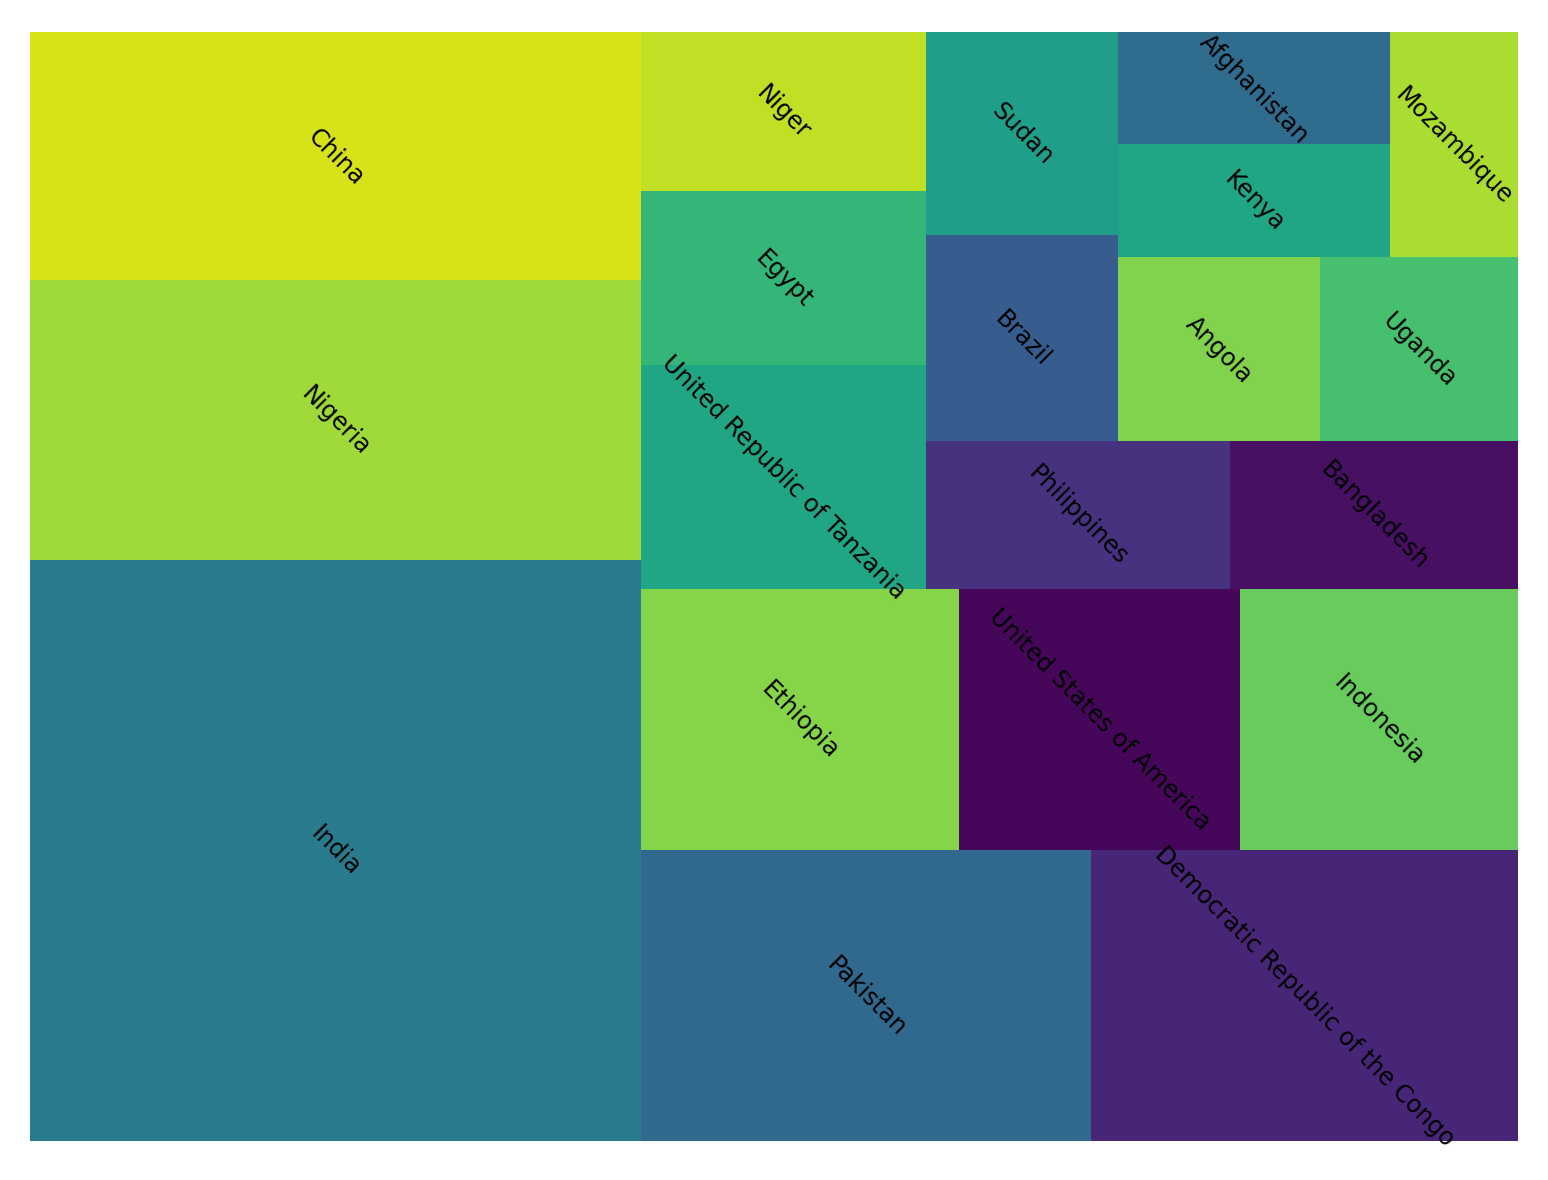

In [243]:
fig, ax = plt.subplots(dpi=300)

ax = squarify.plot(p20_med[:20].loc[:,"Births (single)"].apply(lambda x: int(x*1e9)).values,
              label=p20_med[:20].loc[:,"Region, subregion, country or area *"].values,
              ax=ax,
              text_kwargs=dict(size="xx-small", rotation=-45))
ax.axis("off")

/home/niall/.local/lib/python3.8/site-packages/squarify/__init__.py:170: RuntimeWarning: overflow encountered in scalar add
  total_size = sum(sizes)


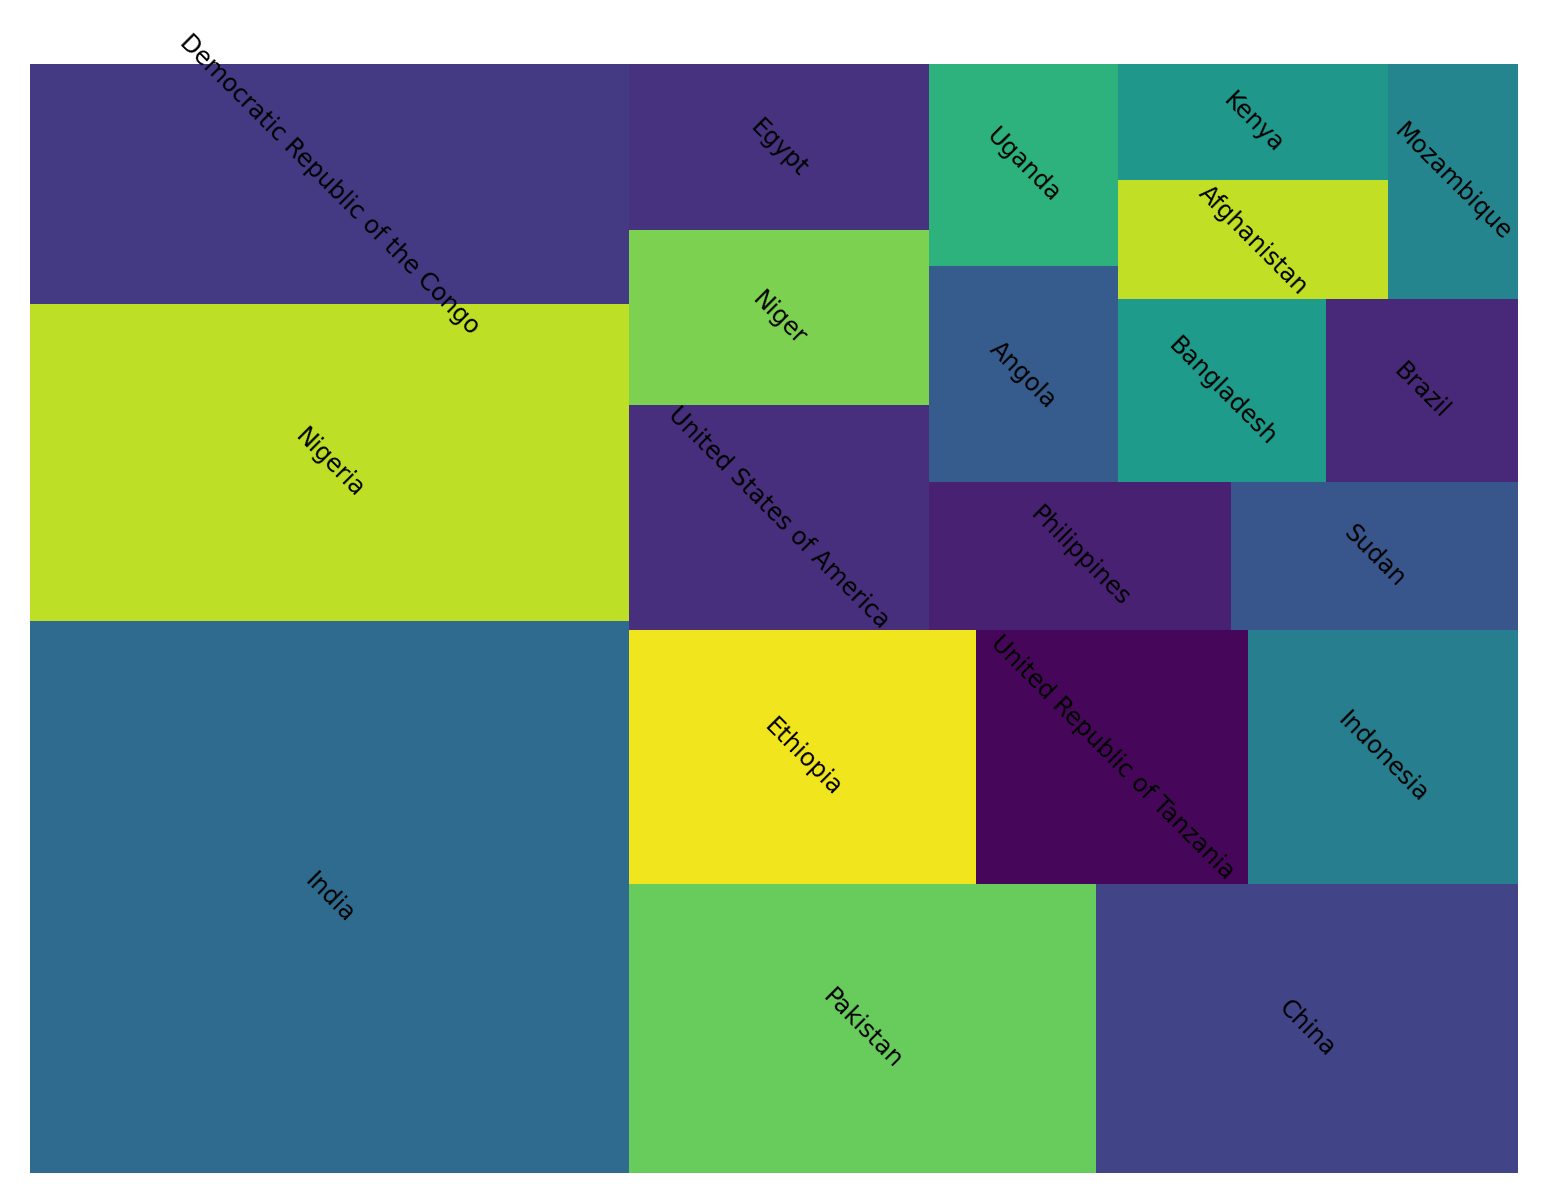

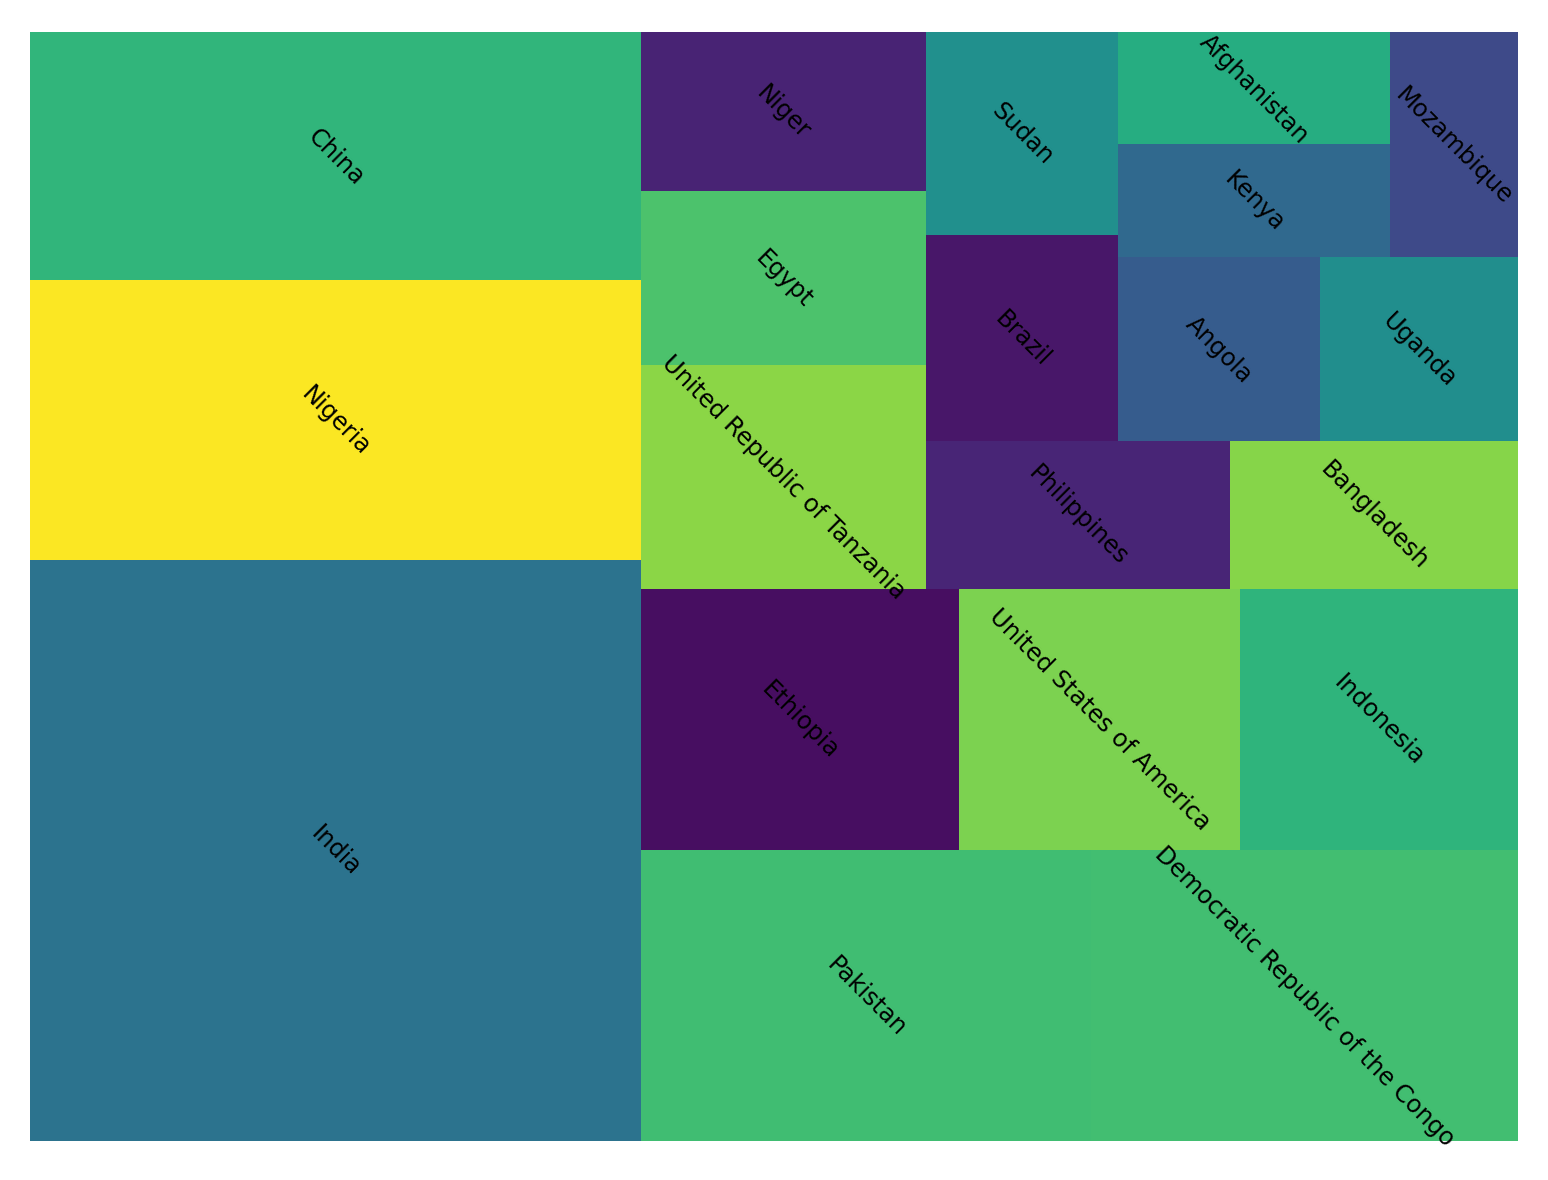

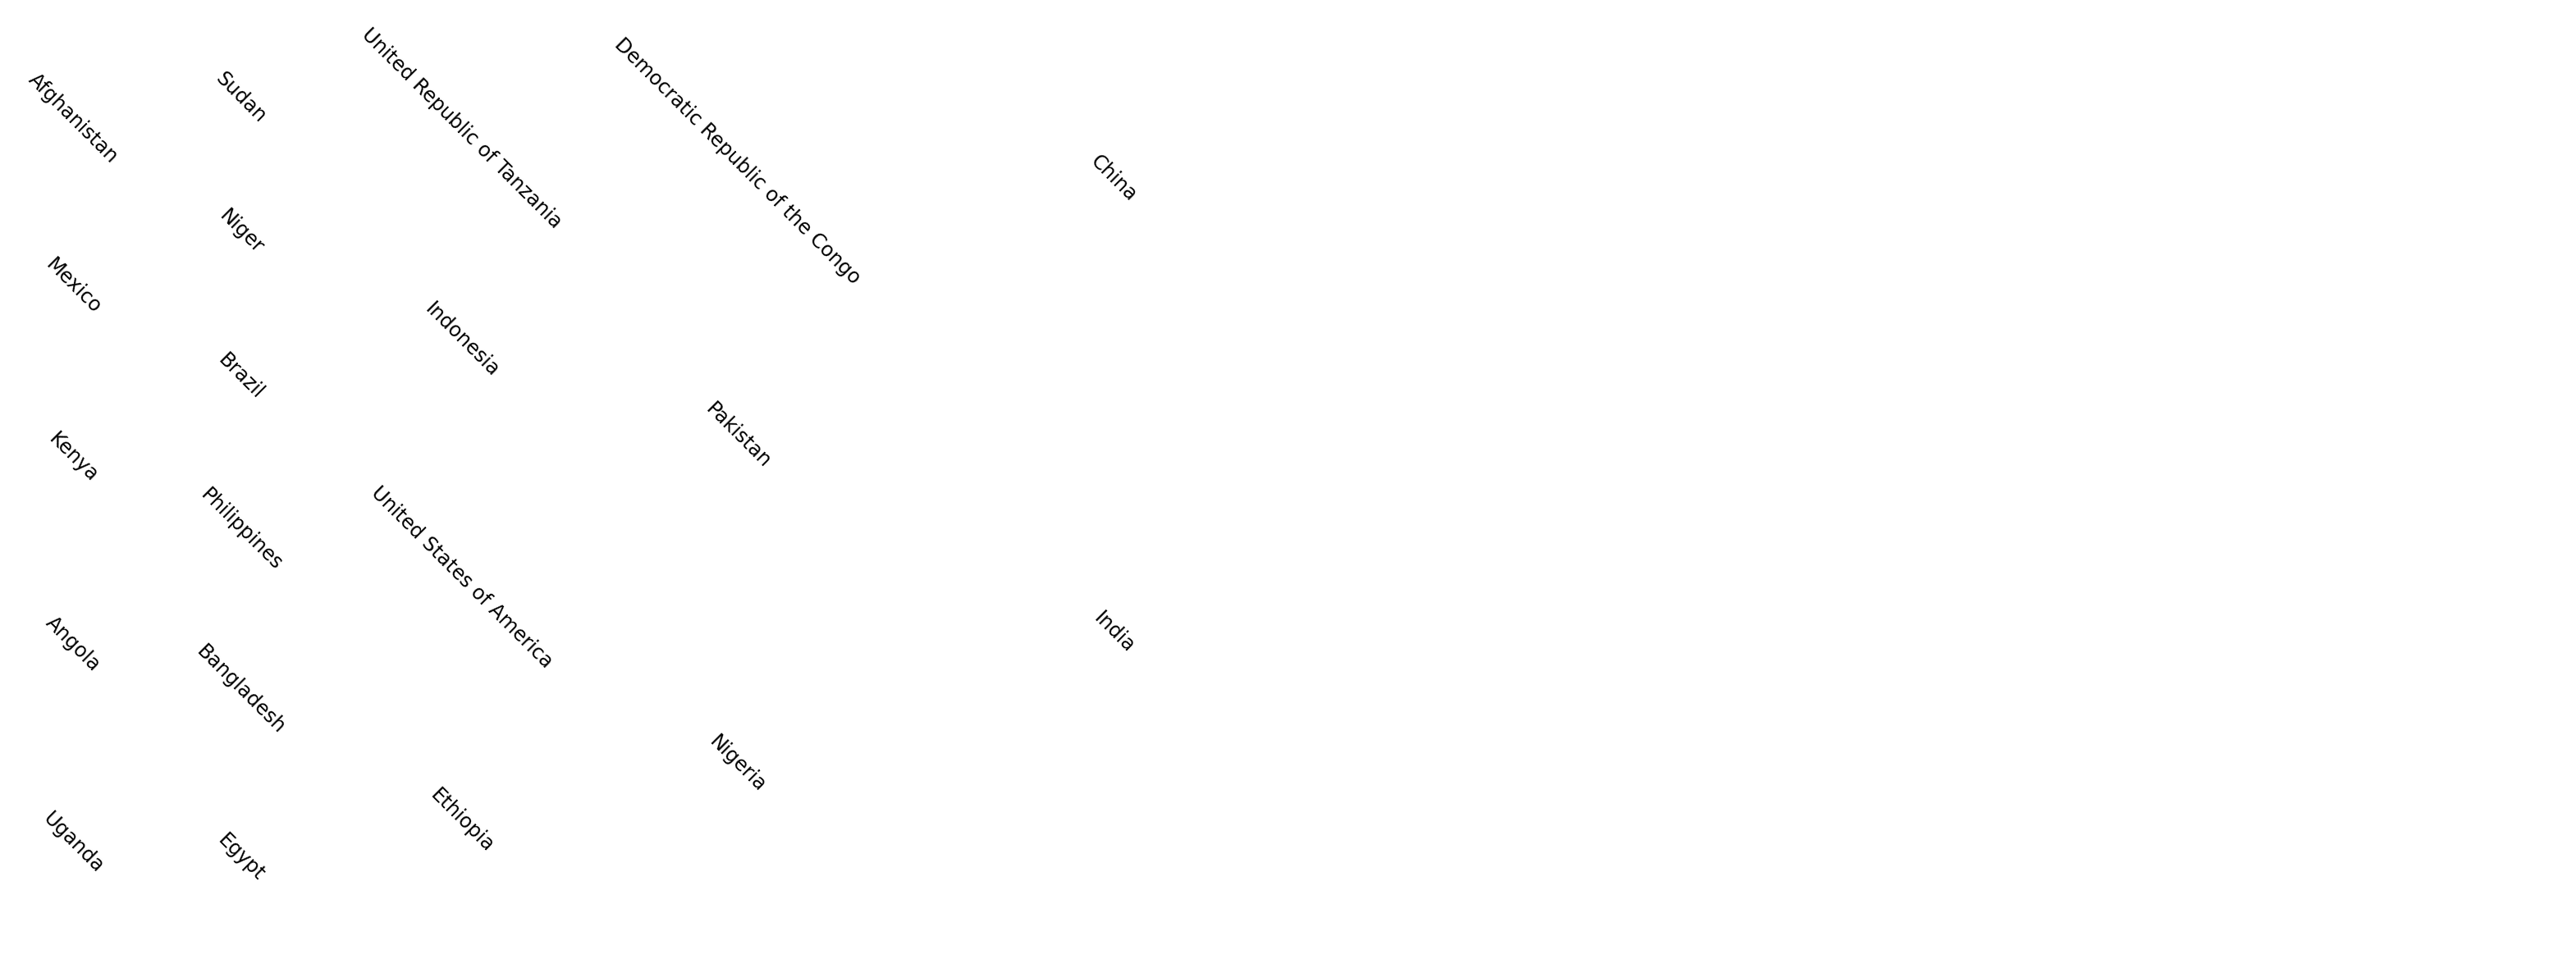

In [245]:
fig, ax = plt.subplots(dpi=300)

ax = squarify.plot(p20_low[:20].loc[:,"Births (single)"].apply(lambda x: int(x*1e9)).values,
              label=p20_low[:20].loc[:,"Region, subregion, country or area *"].values,
              ax=ax,
              text_kwargs=dict(size="xx-small", rotation=-45))
ax.axis("off")
plt.savefig("/tmp/p20_low.png")

fig, ax = plt.subplots(dpi=300)

ax = squarify.plot(p20_med[:20].loc[:,"Births (single)"].apply(lambda x: int(x*1e9)).values,
              label=p20_med[:20].loc[:,"Region, subregion, country or area *"].values,
              ax=ax,
              text_kwargs=dict(size="xx-small", rotation=-45))
ax.axis("off")
plt.savefig("/tmp/p20_med.png")

fig, ax = plt.subplots(dpi=300)

ax = squarify.plot(p20_high[:20].loc[:,"Births (single)"].apply(lambda x: int(x*1e9)).values,
              label=p20_high[:20].loc[:,"Region, subregion, country or area *"].values,
              ax=ax,
              text_kwargs=dict(size="xx-small", rotation=-45))
ax.axis("off")
plt.savefig("/tmp/p20_high.png")

In [ ]:
https://docs.google.com/document/d/13JXdOXKjIGSWlXfF9Wkfcg2b0WT5PPulswurN-mXWgs/edit#heading=h.2qp8yf6qirfe